In [1]:
import numpy as np
import pandas as pd
import adafdr.method as md
import adafdr.data_loader as dl
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

# fMRI: auditory

In [2]:
data_path = '/data3/martin/AdaFDRpaper_data'
file_path = data_path + '/fmri/fmri_imagination'
df_fmri = pd.read_csv(file_path, sep=',')
p = df_fmri['p_val'].as_matrix()
x = df_fmri['B_label'].as_matrix()
print('p:', p.shape)
print('x:', x.shape)

p: (15648,)
x: (15648,)


## covariate visualization

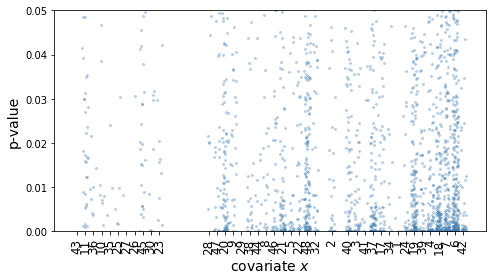

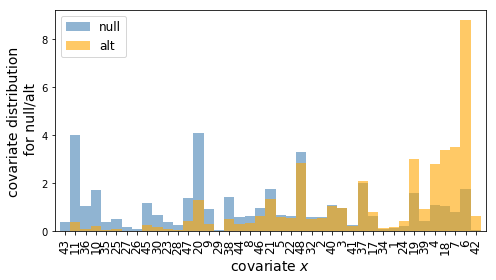

In [3]:
md.adafdr_explore(p, x, output_folder=None, figsize=[7,4])
# md.adafdr_explore(p, x, output_folder=
#                   '/home/martin/NeuralFDR2/result_small_data/result_fmri_imagination',
#                   figsize=[7,4])

## Hypothesis testing

In [4]:
# Baseline methods: BH, SBH
alpha = 0.1
n_rej, t_rej = md.bh_test(p, alpha=alpha, verbose=False)
print('# number of discoveries for BH: %d'%n_rej)
n_rej, t_rej, pi0_hat = md.sbh_test(p, alpha=alpha, verbose=False)
print('# number of discoveries for SBH: %d'%n_rej)
res = md.adafdr_test(p, x, alpha=alpha, fast_mode=True, single_core=False)
n_rej = res['n_rej']
t_rej = res['threshold']
print('# number of discoveries for adafdr: %d'%np.sum(p<=t_rej))

# number of discoveries for BH: 2141
# number of discoveries for SBH: 2228
# number of discoveries for adafdr: 2237


### R methods

In [5]:
%%bash -s "$file_path" "$alpha"
Rscript analysis_fmri.R $1 $2

[1] "data_path: /data3/martin/AdaFDRpaper_data/fmri/fmri_imagination"
[1] "alpha: 0.1"
[1] "Loading the data"
alpha = 0.82: FDPhat 0.82, Number of Rej. 8032
alpha = 0.81: FDPhat 0.81, Number of Rej. 7847
alpha = 0.8: FDPhat 0.8, Number of Rej. 7655
alpha = 0.79: FDPhat 0.7899, Number of Rej. 7445
alpha = 0.78: FDPhat 0.78, Number of Rej. 7354
alpha = 0.77: FDPhat 0.7699, Number of Rej. 7209
alpha = 0.76: FDPhat 0.7599, Number of Rej. 6968
alpha = 0.75: FDPhat 0.75, Number of Rej. 6715
alpha = 0.74: FDPhat 0.7399, Number of Rej. 6682
alpha = 0.73: FDPhat 0.7299, Number of Rej. 6561
alpha = 0.72: FDPhat 0.7199, Number of Rej. 6408
alpha = 0.71: FDPhat 0.7099, Number of Rej. 6191
alpha = 0.7: FDPhat 0.7, Number of Rej. 6070
alpha = 0.69: FDPhat 0.6899, Number of Rej. 5914
alpha = 0.68: FDPhat 0.6799, Number of Rej. 5670
alpha = 0.67: FDPhat 0.6699, Number of Rej. 5571
alpha = 0.66: FDPhat 0.66, Number of Rej. 5394
alpha = 0.65: FDPhat 0.6499, Number of Rej. 5299
alpha = 0.64: FDPhat 0.64,

Loading required package: nlme
This is mgcv 1.8-24. For overview type 'help("mgcv-package")'.
At test #: 10000
